<a href="https://colab.research.google.com/github/thotasriharsha/2159/blob/main/Copy_of_STML_PROJECT_HOUSING_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN

In [ ]:
pip install pandas scikit-learn matplotlib seaborn


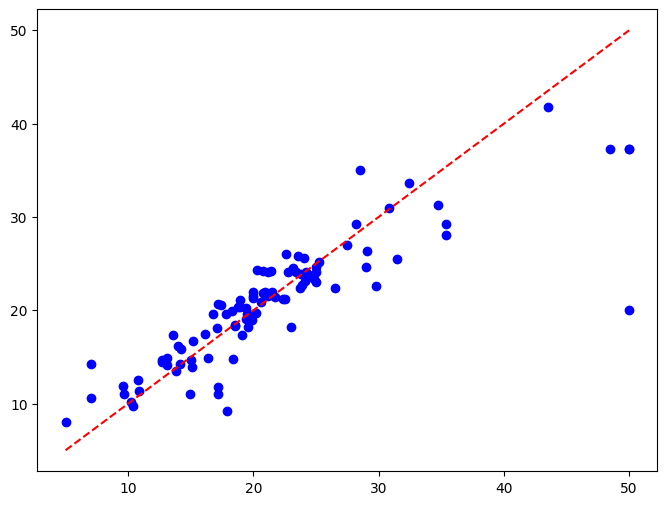

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(url, header=None, names=columns)

X = data.drop('MEDV', axis=1)
y = data['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


K-Mediod

In [ ]:
!pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.0 MB/s eta 0:00:00


Cluster 0 Representative (Medoid):
Size (sqft)      2969
Bedrooms            5
Age (years)        27
Price (USD)    483029
Cluster             0
Name: 5, dtype: int64

Cluster 1 Representative (Medoid):
Size (sqft)      1821
Bedrooms            4
Age (years)         6
Price (USD)    236672
Cluster             1
Name: 57, dtype: int64

Cluster 2 Representative (Medoid):
Size (sqft)      2190
Bedrooms            2
Age (years)        34
Price (USD)    438357
Cluster             2
Name: 49, dtype: int64

Cluster 3 Representative (Medoid):
Size (sqft)      1569
Bedrooms            4
Age (years)        32
Price (USD)    284423
Cluster             3
Name: 13, dtype: int64



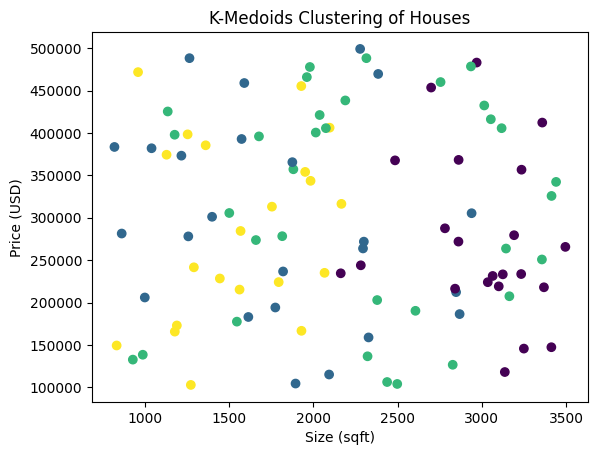

In [ ]:
import numpy as np
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

features = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmedoids = KMedoids(n_clusters=4, random_state=42)
clusters = kmedoids.fit_predict(scaled_features)

house_data["Cluster"] = clusters

for cluster in sorted(house_data["Cluster"].unique()):
    medoid_index = kmedoids.medoid_indices_[cluster]
    print(f"Cluster {cluster} Representative (Medoid):")
    print(house_data.iloc[medoid_index])
    print()

plt.scatter(house_data["Size (sqft)"], house_data["Price (USD)"], c=clusters, cmap="viridis")
plt.xlabel("Size (sqft)")
plt.ylabel("Price (USD)")
plt.title("K-Medoids Clustering of Houses")
plt.show()


Decision Tree

Decision Tree Regression Performance:
Mean Absolute Error: 109877.50
Mean Squared Error: 19769701325.20


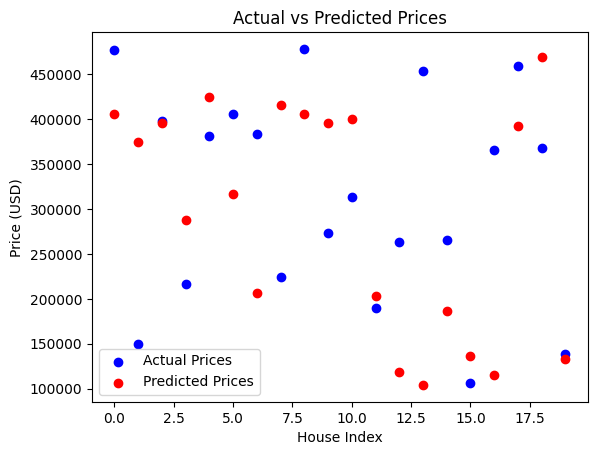

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

X = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
y = house_data["Price (USD)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Decision Tree Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Prices')
plt.xlabel("House Index")
plt.ylabel("Price (USD)")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


Random forest

Random Forest Regression Performance:
Mean Absolute Error: 108741.28
Mean Squared Error: 14486750423.79
Random Forest Regression Performance:
Mean Absolute Error: 108741.28
Mean Squared Error: 14486750423.79


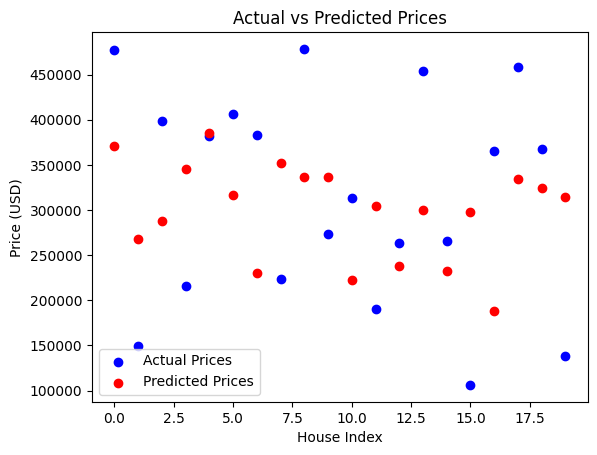

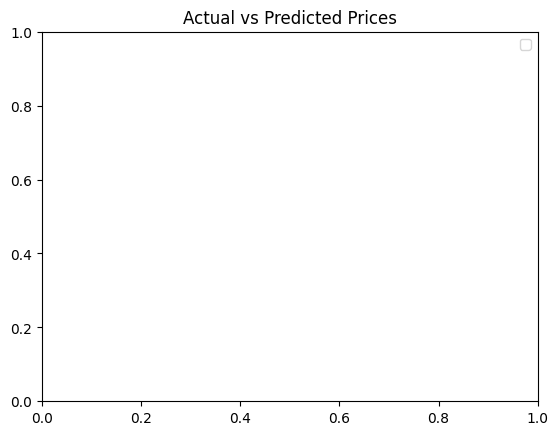

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

X = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
y = house_data["Price (USD)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Random Forest Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

X = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
y = house_data["Price (USD)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Random Forest Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Prices')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Predicted Prices')
plt.xlabel("House Index")
plt.ylabel("Price (USD)")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


SVM

SVM Regression Performance:
Mean Absolute Error: 112077.05
Mean Squared Error: 15159911815.31


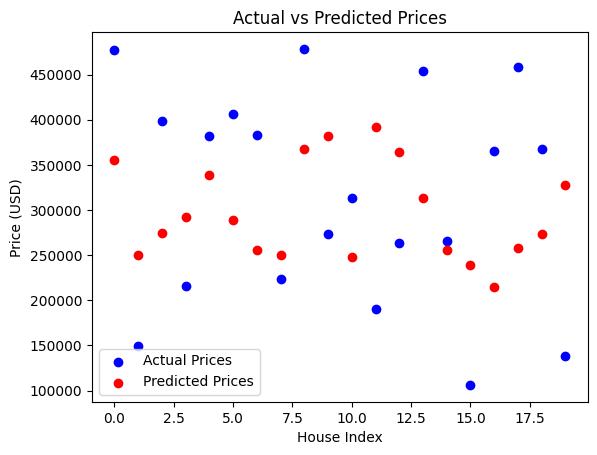

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

X = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
y = house_data["Price (USD)"]

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_scaled = svr_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)

print("SVM Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

plt.scatter(range(len(y_test_original)), y_test_original, color='blue', label='Actual Prices')
plt.scatter(range(len(y_test_original)), y_pred, color='red', label='Predicted Prices')
plt.xlabel("House Index")
plt.ylabel("Price (USD)")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


Confusion Matrix

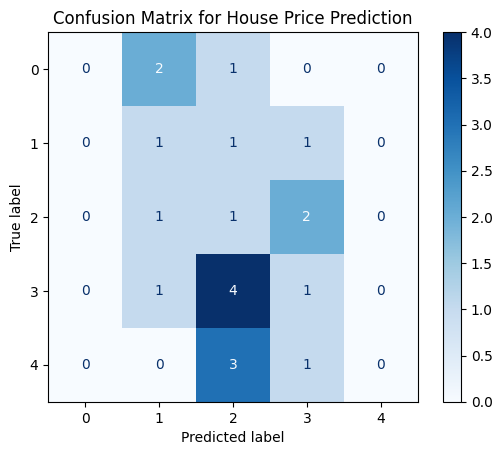

Confusion Matrix:
[[0 2 1 0 0]
 [0 1 1 1 0]
 [0 1 1 2 0]
 [0 1 4 1 0]
 [0 0 3 1 0]]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

X = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
y = house_data["Price (USD)"]

bins = [0, 150000, 250000, 350000, 450000, 500000]
labels = [0, 1, 2, 3, 4]
y_cat = pd.cut(y, bins=bins, labels=labels)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)
y_pred_cat = np.round(y_pred).astype(int)

cm = confusion_matrix(y_test, y_pred_cat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for House Price Prediction")
plt.show()

print("Confusion Matrix:")
print(cm)


Accuracy

SVM Regression Performance:
Mean Absolute Error: 112077.05
Mean Squared Error: 15159911815.31
R² Score: -0.14


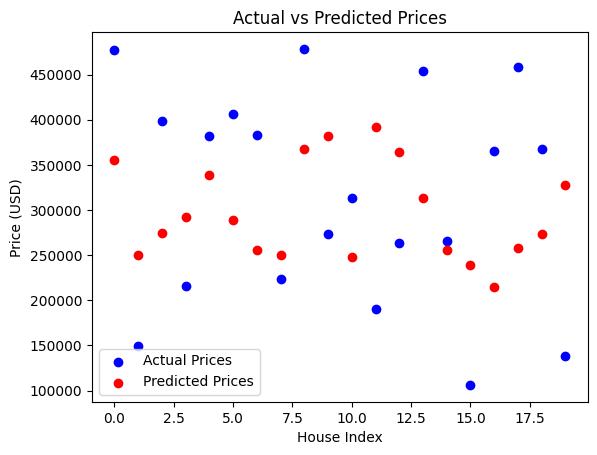

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

X = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
y = house_data["Price (USD)"]

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_scaled = svr_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

mae = mean_absolute_error(y_test_original, y_pred)
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

print("SVM Regression Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

plt.scatter(range(len(y_test_original)), y_test_original, color='blue', label='Actual Prices')
plt.scatter(range(len(y_test_original)), y_pred, color='red', label='Predicted Prices')
plt.xlabel("House Index")
plt.ylabel("Price (USD)")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()


Precision

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, classification_report
import matplotlib.pyplot as plt

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

X = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
y = house_data["Price (USD)"]

bins = [0, 150000, 250000, 350000, 450000, 500000]
labels = [0, 1, 2, 3, 4]
y_cat = pd.cut(y, bins=bins, labels=labels)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)
y_pred_cat = np.round(y_pred).astype(int)

precision = precision_score(y_test, y_pred_cat, average='macro', zero_division=0)

print("Precision Score:", precision)

print("Classification Report:")
print(classification_report(y_test, y_pred_cat))


Precision Score: 0.1
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.20      0.33      0.25         3
           2       0.10      0.25      0.14         4
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         4

    accuracy                           0.15        20
   macro avg       0.10      0.15      0.11        20
weighted avg       0.11      0.15      0.12        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Recall And F1 score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

X = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
y = house_data["Price (USD)"]

bins = [0, 150000, 250000, 350000, 450000, 500000]
labels = [0, 1, 2, 3, 4]
y_cat = pd.cut(y, bins=bins, labels=labels)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, random_state=42)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred = svr_model.predict(X_test)
y_pred_cat = np.round(y_pred).astype(int)

recall = recall_score(y_test, y_pred_cat, average='macro', zero_division=0)
f1 = f1_score(y_test, y_pred_cat, average='macro', zero_division=0)

print("Recall Score:", recall)
print("F1 Score:", f1)

print("Classification Report:")
print(classification_report(y_test, y_pred_cat))


Recall Score: 0.14999999999999997
F1 Score: 0.11493506493506493
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.20      0.33      0.25         3
           2       0.10      0.25      0.14         4
           3       0.20      0.17      0.18         6
           4       0.00      0.00      0.00         4

    accuracy                           0.15        20
   macro avg       0.10      0.15      0.11        20
weighted avg       0.11      0.15      0.12        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Comparsion Table

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

np.random.seed(42)
house_data = pd.DataFrame({
    "Size (sqft)": np.random.randint(800, 3500, 100),
    "Bedrooms": np.random.randint(2, 6, 100),
    "Age (years)": np.random.randint(1, 50, 100),
    "Price (USD)": np.random.randint(100000, 500000, 100)
})

X = house_data[["Size (sqft)", "Bedrooms", "Age (years)"]]
y = house_data["Price (USD)"]

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

models = {
    "SVR": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_pred_inverse = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

    mae = mean_absolute_error(y_test_original, y_pred_inverse)
    mse = mean_squared_error(y_test_original, y_pred_inverse)
    r2 = r2_score(y_test_original, y_pred_inverse)

    results.append([model_name, mae, mse, r2])

comparison_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "R^2"])
print(comparison_df)


           Model            MAE           MSE       R^2
0            SVR  112077.052586  1.515991e+10 -0.142450
1  Random Forest  111454.437000  1.508977e+10 -0.137164
2  Decision Tree  105926.100000  1.810301e+10 -0.364241
